# CUSTOMER CHURN PREDICTION WITH IMBALANCE DATASET USING LOGISTIC REGRESSION

# loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

df= pd.read_csv('Telco-Customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [3]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)

In [4]:
# Step 1: Replace empty strings (' ') with NaN in 'TotalCharges' column
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Step 2: Convert 'TotalCharges' column to numeric (float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Step 3: Fill NaN values in 'TotalCharges' with the median of the column
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Step 4: Optionally convert to integer type after filling NaNs (if appropriate)
df['TotalCharges'] = df['TotalCharges'].astype(int)

# Verify the changes
print(df.dtypes)


customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges       int32
TotalCharges         int32
Churn               object
dtype: object


# One hot encoding

In [5]:

# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                     'DeviceProtection', 'TechSupport', 'PaperlessBilling', 
                     'StreamingTV', 'StreamingMovies', 'Contract', 
                     'PaymentMethod', 'Churn']

# Encode each column and replace the original column with the encoded values
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

# Check the updated DataFrame (with original columns replaced by encoded values)
print(df.head())

# Save the modified DataFrame to a new CSV
df.to_csv('encoded_dataset.csv', index=False)  # This will save the new dataset


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29,29,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56,1889,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53,108,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42,1840,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70,151,1


In [7]:
print(df.dtypes)

customerID          object
gender               int32
SeniorCitizen        int64
Partner              int32
Dependents           int32
tenure               int64
PhoneService         int32
MultipleLines        int32
InternetService      int32
OnlineSecurity       int32
OnlineBackup         int32
DeviceProtection     int32
TechSupport          int32
StreamingTV          int32
StreamingMovies      int32
Contract             int32
PaperlessBilling     int32
PaymentMethod        int32
MonthlyCharges       int32
TotalCharges         int32
Churn                int32
dtype: object


# Imbalanced data

In [8]:
# Handle imbalance: Oversample the minority class (you can also try undersampling or using class weights in the model)
# Assuming 'Churn' is the target column
majority_class = df[df['Churn'] == 0]
minority_class = df[df['Churn'] == 1]

# Upsample minority class
minority_class_upsampled = resample(minority_class, 
                                    replace=True,  # With replacement
                                    n_samples=len(majority_class),  # Match majority class size
                                    random_state=42)

# Combine the majority class with the upsampled minority class
df_balanced = pd.concat([majority_class, minority_class_upsampled])

In [9]:
X = df_balanced.drop(columns=['customerID', 'Churn'])
y = df_balanced['Churn']

# Splitting and training our model

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()

# Fit and transform the training data, then convert back to DataFrame to keep column names
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)

# Transform the test data and convert to DataFrame to keep column names
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Step 6: Initialize and train the logistic regression model
logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(X_train_scaled, y_train)

# Step 7: Predict and evaluate
y_pred = logreg_model.predict(X_test_scaled)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1044
           1       0.75      0.81      0.78      1026

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070

Confusion Matrix:
 [[761 283]
 [195 831]]
ROC AUC Score: 0.4866339166349249


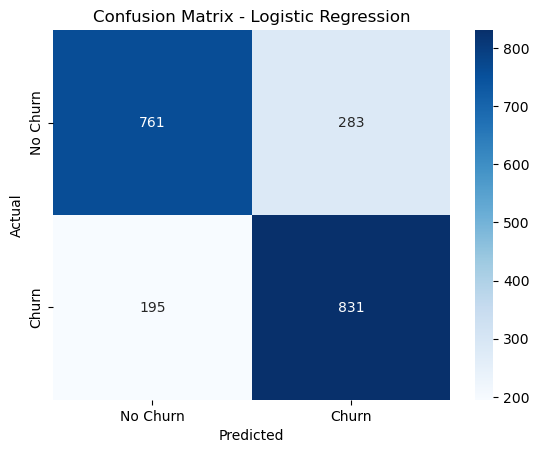

In [12]:
#  Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc}")

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Featute importance

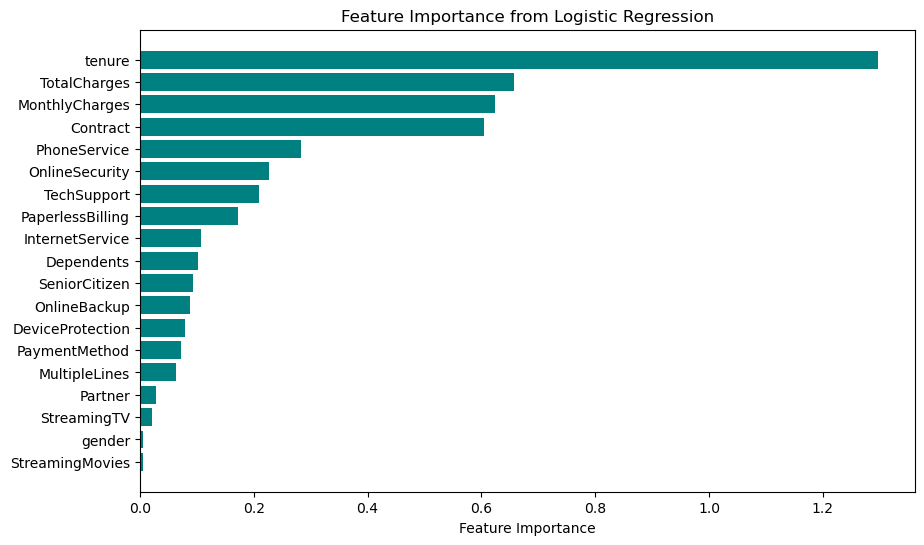

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have trained a Logistic Regression model and have the following:
# `logreg_model` is the trained model
# `X_train_scaled` is the scaled feature data used for training

# Step 1: Get the coefficients from the logistic regression model
coefficients = logreg_model.coef_.flatten()

# Step 2: Create a DataFrame with feature names and their corresponding importance
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)  # Absolute value for importance
})

# Step 3: Sort features by absolute coefficient value (importance)
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Step 4: Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()


### Executive Summary: Causes of Customer Churn

**Overview:**
Customer churn is a key metric for businesses, and understanding its causes is essential for improving retention. Using logistic regression, we have identified the primary factors influencing churn in our customer base.

**Key Findings:**
1. **Contract Type**: Month-to-month contracts have a higher likelihood of churn compared to long-term contracts, suggesting that flexibility may lead to lower commitment.
   
2. **Tenure**: Customers with shorter tenures are more likely to churn, indicating that newer customers might not feel fully integrated or satisfied with the service.
   
3. **Monthly Charges**: Higher monthly charges are strongly correlated with churn, suggesting that price sensitivity and value perception are important factors.
   
4. **Customer Support**: Customers with frequent negative interactions with customer support are more likely to leave, highlighting the need for improved service quality.

**Recommendations:**
- **Encourage Long-term Contracts**: Provide incentives for customers to commit to longer-term plans.
- **Reevaluate Pricing**: Adjust pricing strategies to provide better value for customers paying higher amounts.
- **Enhance Customer Support**: Improve support quality and resolution times to increase satisfaction.

By addressing these factors, businesses can take targeted actions to reduce churn and improve customer retention.